In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("top10_models_by_accuracy.csv")

  vectorizer_type stopwords_option  stopwords_count  c_value  accuracy  \
0           tfidf              NaN                0      0.1  0.832569   
1             bow           custom               30      0.1  0.832569   
2           tfidf           custom               30      0.1  0.829128   
3           tfidf           custom               20      0.1  0.829128   
4             bow           custom               20      0.1  0.826835   

        mcc  train_time            config_str  
0  0.665003    0.391449       tfidf_None_C0.1  
1  0.665108    0.454620    bow_custom_30_C0.1  
2  0.658153    0.347430  tfidf_custom_30_C0.1  
3  0.658158    0.346143  tfidf_custom_20_C0.1  
4  0.653601    0.481716    bow_custom_20_C0.1  


<Figure size 1200x600 with 0 Axes>

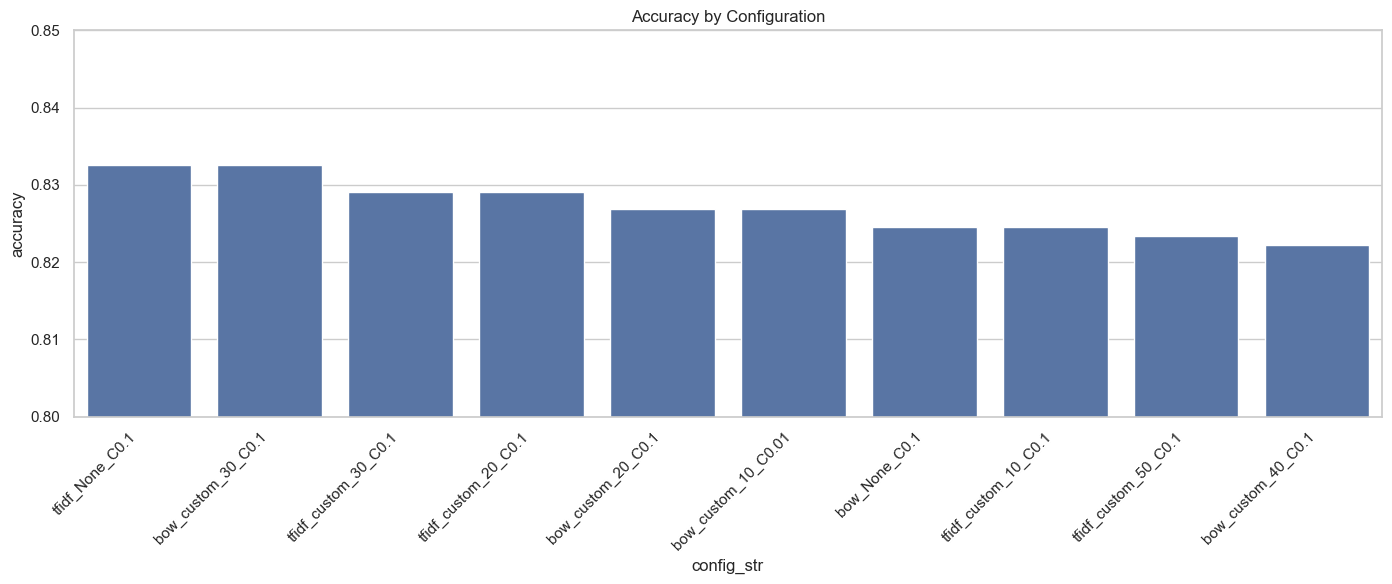

In [6]:
# Preview
print(data.head())

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Accuracy by Config
plt.figure(figsize=(14, 6))
sns.barplot(x="config_str", y="accuracy", data=data)
plt.xticks(rotation=45, ha='right')
plt.title("Accuracy by Configuration")
plt.tight_layout()
plt.ylim(0.8,0.85)
plt.show()

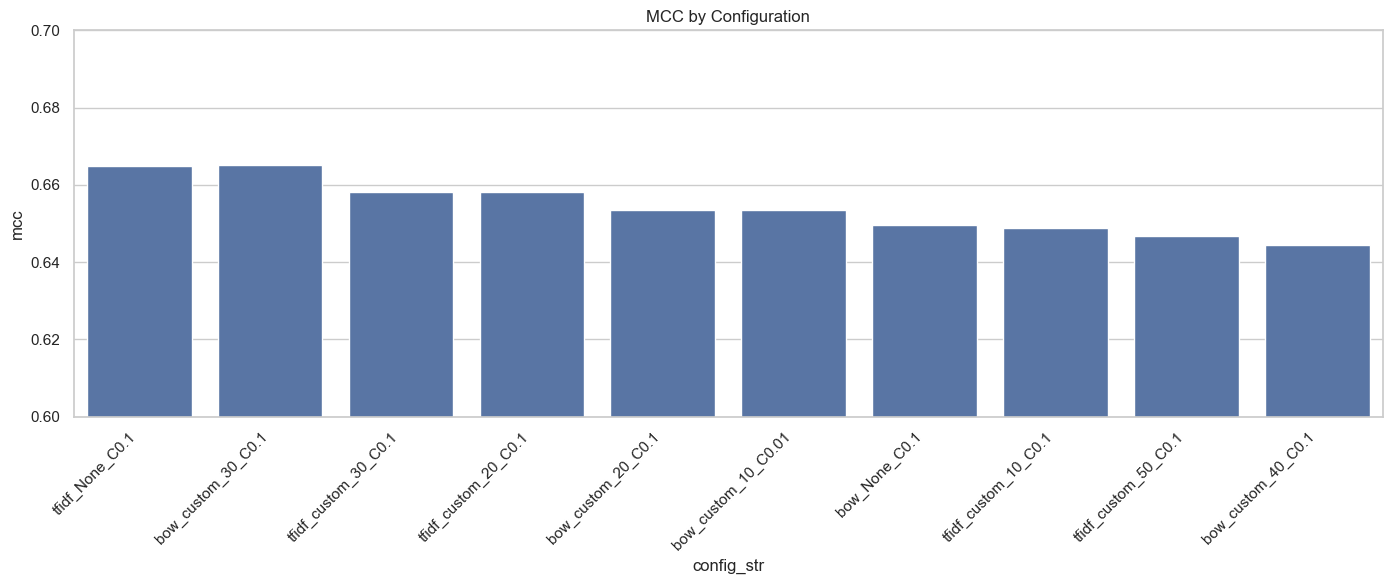

In [8]:
# 2. MCC by Config
plt.figure(figsize=(14, 6))
sns.barplot(x="config_str", y="mcc", data=data)
plt.xticks(rotation=45, ha='right')
plt.title("MCC by Configuration")
plt.tight_layout()
plt.ylim(0.6,0.7)
plt.show()

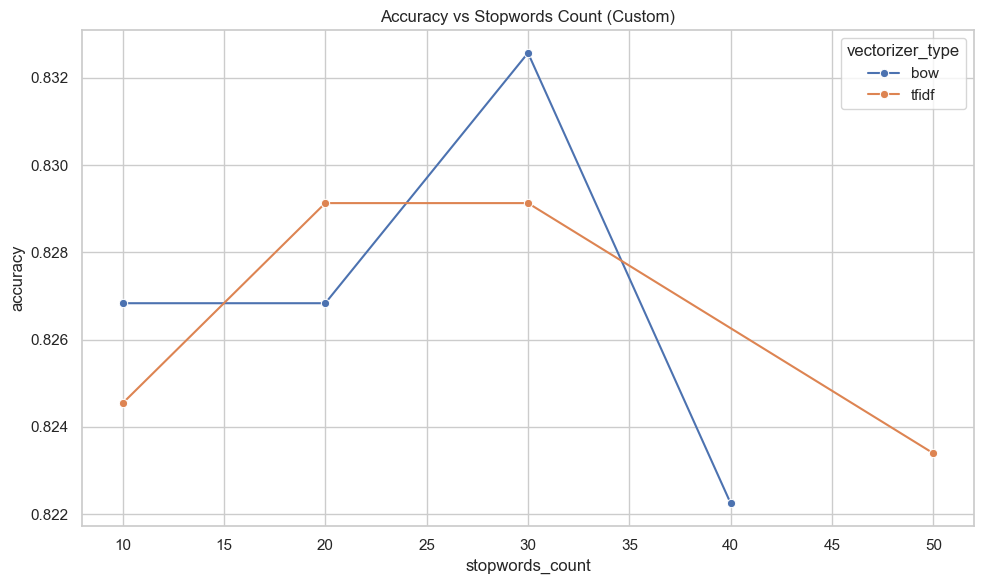

In [9]:

# 4. Accuracy vs Stopwords Count (only where stopwords_option is 'custom')
custom_sw = data[data['stopwords_option'] == 'custom']
plt.figure(figsize=(10, 6))
sns.lineplot(x="stopwords_count", y="accuracy", hue="vectorizer_type", data=custom_sw, marker="o")
plt.title("Accuracy vs Stopwords Count (Custom)")
plt.tight_layout()
plt.show()

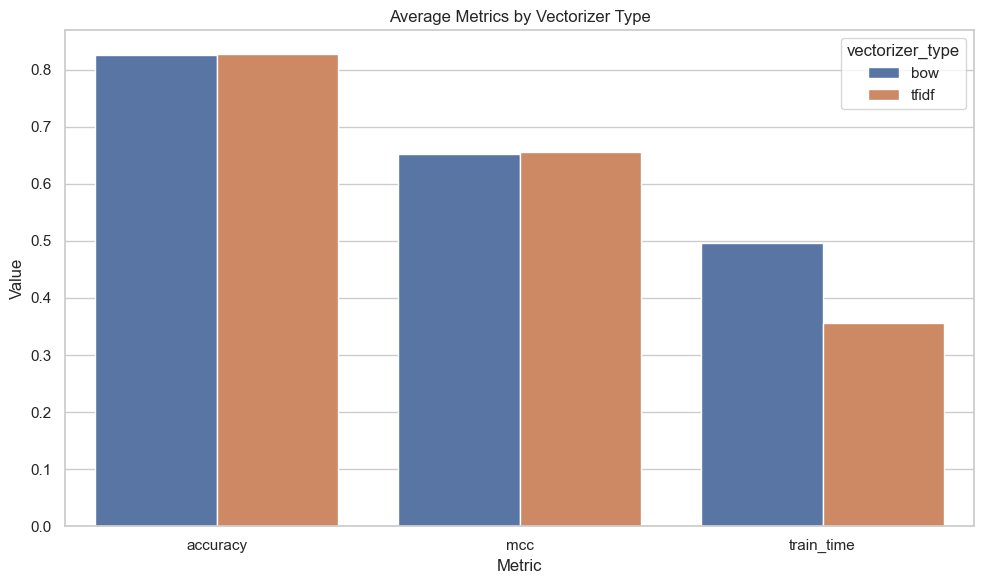

In [10]:
# 5. Grouped bar plot for vectorizer comparison (average metrics)
agg_metrics = data.groupby("vectorizer_type")[["accuracy", "mcc", "train_time"]].mean().reset_index()
agg_metrics = agg_metrics.melt(id_vars="vectorizer_type", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", hue="vectorizer_type", data=agg_metrics)
plt.title("Average Metrics by Vectorizer Type")
plt.tight_layout()
plt.show()